## Redes Neurais Artificiais 2020.1

**Disciplina**: Redes Neurais Artificiais 2020.1  
**Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
**Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta terceira parte do Projeto Prático 3 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Testando Redes Neurais sem os Atributos Categórios

1. Abra a base de dados em questão
2. Elimine todas as colunas relativas aos atributos categóricos
3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
5. Efetue o escalonamento dos atributos

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando-se todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.


### Continuando

5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    5.1 Utilize a função de ativação ReLU  
    5.2 Utilize o solver Adam    
    5.3 Imprima o passo a passo do treinamento    
    5.4 Utilize o número máximo de épocas igual a 300  
6. Com o modelo em questão, após o treinamento, apresente:  
    6.1 Matriz de confusão para o conjunto de teste  
    6.2 Acurácia  
    6.3 F-Score  
    6.4 Precisão  
    6.5 Revocação  
7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes  
    7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
8. Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD  
    8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
9. Houve influência da escolha do otimizador no desempenho da rede?

In [1]:
import pandas as pd
import numpy as np  
import math

from datetime import datetime

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# Abra a base de dados em questão
dados = pd.read_csv("covtype.csv", sep=',', dtype='uint8')
dados.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,36,51,3,2,0,254,221,232,148,135,...,0,0,0,0,0,0,0,0,0,5
1,30,56,2,212,250,134,220,235,151,81,...,0,0,0,0,0,0,0,0,0,5
2,244,139,9,12,65,108,234,238,135,233,...,0,0,0,0,0,0,0,0,0,2
3,225,155,18,242,118,18,238,238,122,67,...,0,0,0,0,0,0,0,0,0,2
4,35,45,2,153,255,135,220,234,150,28,...,0,0,0,0,0,0,0,0,0,5


In [53]:
# Elimine todas as colunas relativas aos atributos categóricos
for i in range(1, 41):
    dados = dados.drop(columns=['Soil_Type'+str(i)], axis=1)
for i in range(1, 5):
    dados = dados.drop(columns=['Wilderness_Area'+str(i)], axis=1)

In [3]:
# Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
x = dados.drop("Cover_Type", axis = 1)
y = dados.Cover_Type

In [4]:
# Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7)

In [5]:
# Efetue o escalonamento dos atributos
x_train_std = (x_train - np.mean(x_train))/np.std(x_train)
x_test_std  = (x_test  - np.mean(x_train))/np.std(x_train)

In [ ]:
# 5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
#     5.1 Utilize a função de ativação ReLU  
#     5.2 Utilize o solver Adam    
#     5.3 Imprima o passo a passo do treinamento    
#     5.4 Utilize o número máximo de épocas igual a 300  
clf = MLPClassifier(hidden_layer_sizes=(10), 
                    activation='relu', 
                    solver='adam', 
                    max_iter=300, 
                    verbose=True)

clf.fit(x_train_std, y_train)

Iteration 1, loss = 1.20352529
Iteration 2, loss = 1.14787939
Iteration 3, loss = 1.14323453
Iteration 4, loss = 1.14125362
Iteration 5, loss = 1.14018363
Iteration 6, loss = 1.13934196
Iteration 7, loss = 1.13855799
Iteration 8, loss = 1.13784278
Iteration 9, loss = 1.13728762
Iteration 10, loss = 1.13678365
Iteration 11, loss = 1.13637491
Iteration 12, loss = 1.13574795
Iteration 13, loss = 1.13504546
Iteration 14, loss = 1.13429920
Iteration 15, loss = 1.13332376
Iteration 16, loss = 1.13238210
Iteration 17, loss = 1.13160569
Iteration 18, loss = 1.13101649
Iteration 19, loss = 1.13055668
Iteration 20, loss = 1.13009165
Iteration 21, loss = 1.12980909
Iteration 22, loss = 1.12955373
Iteration 23, loss = 1.12939143
Iteration 24, loss = 1.12926527
Iteration 25, loss = 1.12909135
Iteration 26, loss = 1.12899590
Iteration 27, loss = 1.12882977
Iteration 28, loss = 1.12873202
Iteration 29, loss = 1.12855701
Iteration 30, loss = 1.12857862
Iteration 31, loss = 1.12846395
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=True,
              warm_start=False)



Acurácia: 0.5006253442261795
F1-score: 0.1518524237893959
Precisão: 0.2247295956017902
Revocação: 0.16382572285201327


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


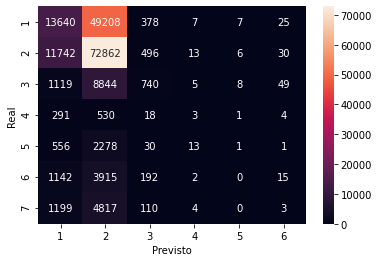

In [ ]:
# 6. Com o modelo em questão, após o treinamento, apresente:  
#     6.1 Matriz de confusão para o conjunto de teste  
#     6.2 Acurácia  
#     6.3 F-Score  
#     6.4 Precisão  
#     6.5 Revocação  

y_pred = clf.predict(x_test_std)
#mc = confusion_matrix(y_test, y_pred)
results = {'real': y_test, 'previsto': y_pred}
results_df = pd.DataFrame.from_dict(results)
mc = pd.crosstab(results_df['real'], results_df['previsto'], rownames=['Real'], colnames=['Previsto'])
sn.heatmap(mc, annot=True, fmt="d")

print('\n\nAcurácia:',accuracy_score(y_test, y_pred))
print('F1-score:',f1_score(y_test, y_pred, average='macro'))
print('Precisão:',precision_score(y_test, y_pred, average='macro'))
print('Revocação:',recall_score(y_test, y_pred, average='macro'))

In [ ]:
# 7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes  
#     7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
#     7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino
clf.verbose = False

accuracy_array = []
f1_score_array = []

start_time_adam = datetime.now().strftime("%H:%M:%S")

for i in range(15):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

    X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
    X_test_std  = (X_test  - np.mean(X_train))/np.std(X_train)
    
    clf.fit(X_train_std, y_train)

    y_pred = clf.predict(X_test_std)

    accuracy_array.append(accuracy_score(y_test, y_pred))
    f1_score_array.append(f1_score(y_test, y_pred, average='macro'))

end_time_adam = datetime.now().strftime("%H:%M:%S")

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
print("Otimizador 'Adam' | Média da Acurácia:", np.mean(accuracy_array))
print("Otimizador 'Adam' | Desvio Padrão da Acurácia:", np.std(accuracy_array))

print("Otimizador 'Adam' | Média do F-Score:", np.mean(f1_score_array))
print("Otimizador 'Adam' | Desvio Padrão do F-Score:", np.std(f1_score_array))

Otimizador 'Adam' | Média da Acurácia: 0.49860779634049324
Otimizador 'Adam' | Desvio Padrão da Acurácia: 0.001444648658448551
Otimizador 'Adam' | Média do F-Score: 0.15594179087241603
Otimizador 'Adam' | Desvio Padrão do F-Score: 0.003035780572220513


In [ ]:
# 8. Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD  
#     8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
clf.solver = 'sgd'

accuracy_array = []
f1_score_array = []

start_time_SGD = datetime.now().strftime("%H:%M:%S")

for i in range(15):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

    X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
    X_test_std  = (X_test  - np.mean(X_train))/np.std(X_train)
    
    clf.fit(X_train_std, y_train)

    y_pred = clf.predict(X_test_std)

    accuracy_array.append(accuracy_score(y_test, y_pred))
    f1_score_array.append(f1_score(y_test, y_pred, average='macro'))

end_time_SGD = datetime.now().strftime("%H:%M:%S")

In [ ]:
print("Otimizador 'SGD' | Média da Acurácia:", np.mean(accuracy_array))
print("Otimizador 'SGD' | Desvio Padrão da Acurácia:", np.std(accuracy_array))

print("Otimizador 'SGD' | Média do F-Score:", np.mean(f1_score_array))
print("Otimizador 'SGD' | Desvio Padrão do F-Score:", np.std(f1_score_array))

Otimizador 'SGD' | Média da Acurácia: 0.4965581206780491
Otimizador 'SGD' | Desvio Padrão da Acurácia: 0.002094415566786464
Otimizador 'SGD' | Média do F-Score: 0.15121730347697307
Otimizador 'SGD' | Desvio Padrão do F-Score: 0.0032061293658015985


In [ ]:
# 9. Houve influência da escolha do otimizador no desempenho da rede?

# Resposta: Houve uma diferença bem suave no valor da acuracia e do F-score, 
# sendo superior no otimizador 'Adam' (algumas casas decimais de diferença). 
# O tempo de execução foi significativo: 
# -----> Otimizador 'Adam' durou  67.05  minutos
# -----> Otimizador 'SGD'  durou  79.05  minutos

duration_adam = (datetime.strptime(end_time_adam, '%H:%M:%S') - datetime.strptime(start_time_adam, '%H:%M:%S'))
duration_adam = duration_adam.seconds/60
duration_SGD = (datetime.strptime(end_time_SGD, '%H:%M:%S') - datetime.strptime(start_time_SGD, '%H:%M:%S'))
duration_SGD = duration_SGD.seconds/60

print("Otimizador 'Adam' durou ", duration_adam, " minutos")
print("Otimizador 'SGD'  durou ", duration_SGD, " minutos")

Otimizador 'Adam' durou  11.066666666666666  minutos
Otimizador 'SGD'  durou  14.05  minutos


## Discussão

Nos passos anteriores, você avaliou o desempenho de uma única rede neural que contém os seguintes parâmetros: uma única camada oculta com 10 neurônios e função de ativação ReLU. O otimizador utilizado, quer seja SGD ou ADAM, trata-se do algoritmo para aproximar o gradiente do erro. Neste sentido, a escolha do otimizador é um hiperparâmetro, pois diz respeito a como a rede neural definida previamente atuará "em tempo de execução"  durante o processo de treinamento. Também são hiperparâmetros a quantidade de épocas, a taxa de aprendizado inicial, dentre outros.

Cabe alientar também que você efetuou o treinamento desta rede por 100 vezes e apresentou os resultados em termos de média +- desvio padrão. Lembre-se que em uma rede neural há a inicialização aleatória de pesos e, em consequência, o desempenho delas está sujeito à uma flutuação estocástica. A execução destas múltiplas vezes faz com que eliminemos algum viés introduzido por uma boa ou má "sorte" na escolha de pesos no caso de uma única execução.

Você também aprendeu uma estratégia para escalonar os atributos para uma melhor convergência da rede. Utilize-a em todos os treinamentos e testes propostos a seguir.

## Propondo Novas Arquiteturas

Variando  os parâmetros (uma ou duas camadas ocultas, com diferente números de neurônios em cada uma delas e a função de ativação) e o hiperparâmetros solver (Adam ou SGD) e o número de épocas (100,150 e 200), atenda ao que se pede:

1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes
3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn  

In [ ]:
# 1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
def show_architectures(architecture):
  for i in range(len(architecture)):
    print('\n\n--> Configuração',i,
          '\nOtimizador: ',architecture[i][0],
          '\nÉpocas:',architecture[i][1],
          '\nCamada oculta:',architecture[i][2],
          '\nFunção de ativação:',architecture[i][3],
          )

config = [  ['sgd',  100,(20,),   'relu'],
            ['sgd',  100,(10,10), 'relu'],
            ['sgd',  150,(100,),  'relu'],
            ['sgd',  150,(5,5), 'relu'],
            ['sgd',  200,(7,10),   'relu'],
            ['sgd',  200,(10,5), 'relu'],
            ['adam', 100,(30,),   'tanh'],
            ['adam', 150,(25,3), 'tanh'],
            ['adam', 200,(5,10), 'tanh'],
            ['adam', 100,(20,5), 'tanh']]

show_architectures(config)



--> Configuração 0 
Otimizador:  sgd 
Épocas: 100 
Camada oculta: (20,) 
Função de ativação: relu


--> Configuração 1 
Otimizador:  sgd 
Épocas: 100 
Camada oculta: (10, 10) 
Função de ativação: relu


--> Configuração 2 
Otimizador:  sgd 
Épocas: 150 
Camada oculta: (100,) 
Função de ativação: relu


--> Configuração 3 
Otimizador:  sgd 
Épocas: 150 
Camada oculta: (5, 5) 
Função de ativação: relu


--> Configuração 4 
Otimizador:  sgd 
Épocas: 200 
Camada oculta: (7, 10) 
Função de ativação: relu


--> Configuração 5 
Otimizador:  sgd 
Épocas: 200 
Camada oculta: (10, 5) 
Função de ativação: relu


--> Configuração 6 
Otimizador:  adam 
Épocas: 100 
Camada oculta: (30,) 
Função de ativação: tanh


--> Configuração 7 
Otimizador:  adam 
Épocas: 150 
Camada oculta: (25, 3) 
Função de ativação: tanh


--> Configuração 8 
Otimizador:  adam 
Épocas: 200 
Camada oculta: (5, 10) 
Função de ativação: tanh


--> Configuração 9 
Otimizador:  adam 
Épocas: 100 
Camada oculta: (20, 5) 
Função

In [61]:
def architecture_training(architecture):
  architecture_accuracy_array = []
  architecture_f1_score_array = []
  architecture_y_pred_array = []
  architecture_y_real_array = []

  for i in range(len(architecture)):
      clf = MLPClassifier(hidden_layer_sizes=architecture[i][2], activation=architecture[i][3], solver=architecture[i][0], max_iter=architecture[i][1], verbose=False ,random_state=1)
      
      for j in range(15):     
          X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
          X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
          clf.fit(X_train_std, y_train)
          
      X_test_std  = (X_test  - np.mean(X_train))/np.std(X_train)
      y_pred = clf.predict(X_test_std)
      
      architecture_y_pred_array.append(y_pred)
      architecture_y_real_array.append(y_test)
      
      architecture_accuracy_array.append(accuracy_score(y_test, y_pred))
      architecture_f1_score_array.append(f1_score(y_test, y_pred, average='macro'))
        
#       print('\n\n----- Configuração -----',
#           '\n-- Omtimizador :', architecture[i][0],
#           '\n-- Épocas :', architecture[i][1],
#           '\n-- Camadas/neuronios :', architecture[i][2],
#           '\n-- Função de ativação :', architecture[i][3])
#       print('-> Acurácia: ', accuracy_score(new_y_test, new_y_pred))
#       print('-> F1-score: ', f1_score(new_y_test, new_y_pred, average='macro'),'\n')

  return architecture_accuracy_array, architecture_f1_score_array, architecture_y_pred_array, architecture_y_real_array

def plot_top3_configs(plot_accuracy_array_plot, plot_f1_score_array_plot, plot_y_pred_array_plot, plot_y_real_array_plot, plot_config):      
  top3 = sorted(zip(plot_accuracy_array_plot, plot_f1_score_array_plot), reverse=True)[:3]

  _1 = plot_accuracy_array_plot.index(top3[0][0])
  _2 = plot_accuracy_array_plot.index(top3[1][0])
  _3 = plot_accuracy_array_plot.index(top3[2][0])

  index_top3 = [_1,_2,_3]
  cont = 1
  for i in index_top3:
      results_df = pd.DataFrame.from_dict({'real': plot_y_real_array_plot[i], 'previsto': plot_y_pred_array_plot[i]})
      mc = pd.crosstab(results_df['real'], results_df['previsto'], rownames=['Real'], colnames=['Previsto'])
      sn.heatmap(mc, annot=True, fmt="d")
      plt.title('Configuração TOP: ' +str(cont)+
                '\nHiperparâmetros: '+str(plot_config[i])+
                '\nAcurácia: '+str(plot_accuracy_array_plot[i])+
                '\nF-score: ' +str(plot_f1_score_array_plot[i]))
      plt.show()
      cont+=1

In [ ]:
accuracy_array, f1_score_array, y_pred_array, y_real_array = architecture_training(config)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)




----- Configuração ----- 
-- Omtimizador : sgd 
-- Épocas : 100 
-- Camadas/neuronios : (20,) 
-- Função de ativação : relu
-> Acurácia:  0.5012908481733064
-> F1-score:  0.15442076052280826 



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)




----- Configuração ----- 
-- Omtimizador : sgd 
-- Épocas : 100 
-- Camadas/neuronios : (10, 10) 
-- Função de ativação : relu
-> Acurácia:  0.5004130714154581
-> F1-score:  0.1606069222562319 



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)




----- Configuração ----- 
-- Omtimizador : sgd 
-- Épocas : 150 
-- Camadas/neuronios : (100,) 
-- Função de ativação : relu
-> Acurácia:  0.5144689737470167
-> F1-score:  0.1767831023994136 



----- Configuração ----- 
-- Omtimizador : sgd 
-- Épocas : 150 
-- Camadas/neuronios : (5, 5) 
-- Função de ativação : relu
-> Acurácia:  0.4926679823756196
-> F1-score:  0.14035677225699975 



----- Configuração ----- 
-- Omtimizador : sgd 
-- Épocas : 200 
-- Camadas/neuronios : (7, 10) 
-- Função de ativação : relu
-> Acurácia:  0.4973035615935377
-> F1-score:  0.15058933157076687 



----- Configuração ----- 
-- Omtimizador : sgd 
-- Épocas : 200 
-- Camadas/neuronios : (10, 5) 
-- Função de ativação : relu
-> Acurácia:  0.49798627684964203
-> F1-score:  0.16436640605339706 



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)




----- Configuração ----- 
-- Omtimizador : adam 
-- Épocas : 100 
-- Camadas/neuronios : (30,) 
-- Função de ativação : tanh
-> Acurácia:  0.5101948320176244
-> F1-score:  0.1876043435962154 



----- Configuração ----- 
-- Omtimizador : adam 
-- Épocas : 150 
-- Camadas/neuronios : (25, 3) 
-- Função de ativação : tanh
-> Acurácia:  0.5025989076555902
-> F1-score:  0.16595313032701772 



----- Configuração ----- 
-- Omtimizador : adam 
-- Épocas : 200 
-- Camadas/neuronios : (5, 10) 
-- Função de ativação : tanh
-> Acurácia:  0.4987493115476409
-> F1-score:  0.15442898230437369 



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)




----- Configuração ----- 
-- Omtimizador : adam 
-- Épocas : 100 
-- Camadas/neuronios : (20, 5) 
-- Função de ativação : tanh
-> Acurácia:  0.5053068202680374
-> F1-score:  0.178066131547651 



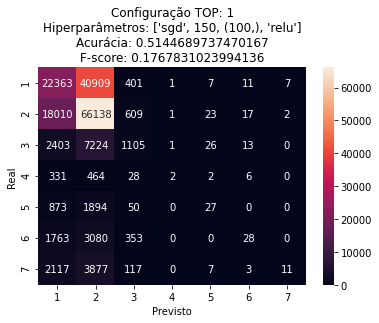

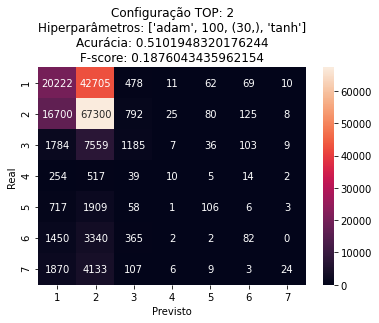

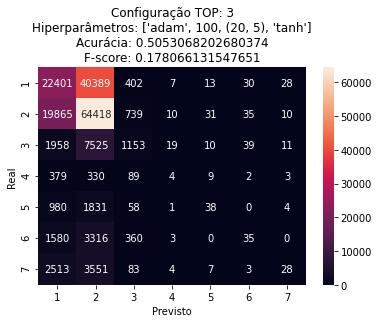

In [ ]:
# 2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes
# 3. Como resultado da avaliação, apresente:  
#     3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
#     3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn

plot_top3_configs(accuracy_array, f1_score_array, y_pred_array, y_real_array, config)

## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída. 

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_h$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia  

In [ ]:
# 1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de  Ni  e  Nh .

# Resposta: 
# O valor de 'Ni' corresponde a quantidade de atributos preditores do problema, sendo então o valor 10.
# O valor de 'No' corresponde aos tipos de respostas que a rede poderá prever, neste problema de classificação multiclasse, 'No' tem valor 7.
# O valor de 'Nh' portanto correspondente a: 
# Alph*Raiz('Ni'*'No') -----> Alph*math.sqrt(10*7) -----> Alph*math.sqrt(70)
# Logo, Nh possui 3 valores pois depende de Alph

Ni = 10
No = 7
alph = [0.5, 2, 3]
Nh = [
      int(alph[0]*math.sqrt(Ni*No)),
      int(alph[1]*math.sqrt(Ni*No)),
      int(alph[2]*math.sqrt(Ni*No))
     ]

# 2. Teste os valores de Alpha como sendo iguais a 0.5, 2 e 3.

print('Valor de Ni:',10)
print('\nValor de Nh 1°:',Nh[0],'\nValor de Nh 2°:',Nh[1],'\nValor de Nh 3°:',Nh[2])

Valor de Ni: 10

Valor de Nh 1°: 4 
Valor de Nh 2°: 16 
Valor de Nh 3°: 25


In [ ]:
# 3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  

# ---> OBS: Nesta celula ocorre a GERAÇÃO das novas arquiteturas
    
def architecture_generator_for_neural_network():
  architecture = []
  epochs = [100, 70, 80, 60, 50, 40]
  activation_functions = ['relu', 'tanh','identity']
  optimizer = ['adam','sgd']

  for i in range(30):
    for a in range(i,len(optimizer)):
      for b in range(a,len(activation_functions)):
        for c in range(b,len(epochs)):
          architecture.append([
                               optimizer[a],
                               epochs[c],
                               (Nh[b],),
                               activation_functions[b]
                               ])
  architecture.pop()
  architecture.pop()
  architecture.pop()
  print('Quantidade de arquiteturas: ',len(architecture))
  show_architectures(architecture)
  return architecture
  
new_config = architecture_generator_for_neural_network()

Quantidade de arquiteturas:  30


--> Configuração 0 
Otimizador:  adam 
Épocas: 100 
Camada oculta: (4,) 
Função de ativação: relu


--> Configuração 1 
Otimizador:  adam 
Épocas: 70 
Camada oculta: (4,) 
Função de ativação: relu


--> Configuração 2 
Otimizador:  adam 
Épocas: 80 
Camada oculta: (4,) 
Função de ativação: relu


--> Configuração 3 
Otimizador:  adam 
Épocas: 60 
Camada oculta: (4,) 
Função de ativação: relu


--> Configuração 4 
Otimizador:  adam 
Épocas: 50 
Camada oculta: (4,) 
Função de ativação: relu


--> Configuração 5 
Otimizador:  adam 
Épocas: 40 
Camada oculta: (4,) 
Função de ativação: relu


--> Configuração 6 
Otimizador:  adam 
Épocas: 70 
Camada oculta: (16,) 
Função de ativação: tanh


--> Configuração 7 
Otimizador:  adam 
Épocas: 80 
Camada oculta: (16,) 
Função de ativação: tanh


--> Configuração 8 
Otimizador:  adam 
Épocas: 60 
Camada oculta: (16,) 
Função de ativação: tanh


--> Configuração 9 
Otimizador:  adam 
Épocas: 50 
Camada oculta: (16,)

In [ ]:
# 3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
new_accuracy_array, new_f1_score_array, new_y_pred_array, new_y_real_array = architecture_training(new_config)

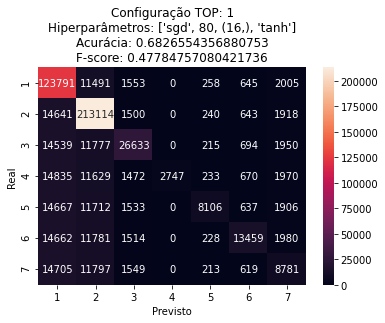

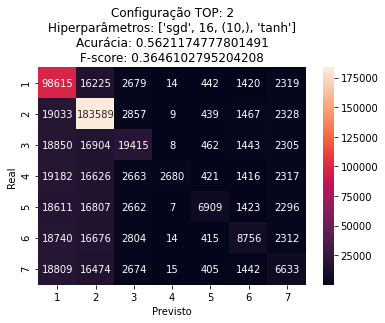

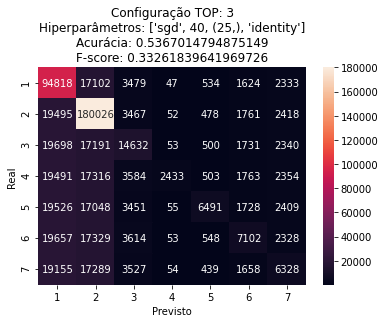

In [63]:
# Ilustração do top 3 de configurações das 30 escolhidas
plot_top3_configs(new_accuracy_array, new_f1_score_array, new_y_pred_array, new_y_real_array, new_config)

## Testando as Redes Neurais com Atributos Categóricos

1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)
2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições  
    2.1 Considere o melhor otimizador para cada uma delas  
    2.2 Faça uso de 200 épocas para treinamento  
    2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura
3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 100 repetições

In [ ]:
# 1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)
top6_config = [ ['sgd',  150, (100,), 'relu'],
                ['adam', 100, (30,), 'tanh'],
                ['adam', 100, (20,5), 'tanh'],
                ['sgd',   80, (16,), 'tanh'],
                ['adam',  60, (16,), 'tanh'],
                ['adam',  40, (25,), 'identity'] ]

In [ ]:
# 2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições

# Nova leitura dos dados 
new_dados = pd.read_csv("covtype.csv", sep=',', dtype='uint8')
# Separação do atributo preditor
new_x = new_dados.drop("Cover_Type", axis = 1)
new_y = new_dados.Cover_Type
# Holdout dos novos dados
new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x, new_y, test_size=0.3, train_size=0.7)
# Escalonamento
new_x_train_std = (new_x_train - np.mean(new_x_train))/np.std(new_x_train)
new_x_test_std  = (new_x_test  - np.mean(new_x_train))/np.std(new_x_train)

In [2]:
# 2.1 Considere o melhor otimizador para cada uma delas
# 2.2 Faça uso de 200 épocas para treinamento

top6_architecture_accuracy_array = []
top6_architecture_f1_score_array = []
top6_architecture_y_pred_array = []
top6_architecture_y_real_array = []

for i in range(len(top6_config)):
    clf = MLPClassifier(hidden_layer_sizes=top6_config[i][2], activation=top6_config[i][3], solver=top6_config[i][0], max_iter=200, verbose=False ,random_state=1)
    
    for j in range(15):     
        #X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
        new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_x, new_y, test_size=0.3, train_size=0.7)

        #X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
        new_x_train_std = (new_x_train - np.mean(new_x_train))/np.std(new_x_train)

        clf.fit(new_x_train_std, new_y_train)
          
    #X_test_std  = (X_test  - np.mean(X_train))/np.std(X_train)
    new_x_test_std  = (new_x_test  - np.mean(new_x_train))/np.std(new_x_train)

    new_y_pred = clf.predict(new_x_test_std)
    
    top6_architecture_y_pred_array.append(new_y_pred)
    top6_architecture_y_real_array.append(new_y_test)
    
    top6_architecture_accuracy_array.append(accuracy_score(new_y_test, new_y_pred))
    top6_architecture_f1_score_array.append(f1_score(new_y_test, new_y_pred, average='macro'))

    print('\n\n----- Configuração -----',
          '\n-- Otimizador :', top6_config[i][0],
          '\n-- Épocas :', 200,
          '\n-- Camadas/neuronios :', top6_config[i][2],
          '\n-- Função de ativação :', top6_config[i][3])
    print('-> Acurácia: ', accuracy_score(new_y_test, new_y_pred))
    print('-> F1-score: ', f1_score(new_y_test, new_y_pred, average='macro'),'\n')



----- Configuração ----- 
-- Otimizador : sgd 
-- Épocas : 200 
-- Camadas/neuronios : (100,) 
-- Função de ativação : relu
-> Acurácia:  0.7030360749036166
-> F1-score:  0.5869215075326396 



----- Configuração ----- 
-- Otimizador : adam 
-- Épocas : 200 
-- Camadas/neuronios : (30,) 
-- Função de ativação : tanh
-> Acurácia:  0.689513723150358
-> F1-score:  0.564027061575797 



----- Configuração ----- 
-- Otimizador : adam 
-- Épocas : 200 
-- Camadas/neuronios : (20, 5) 
-- Função de ativação : tanh
-> Acurácia:  0.6789000826142831
-> F1-score:  0.5163556617097947 



----- Configuração ----- 
-- Otimizador : sgd 
-- Épocas : 200 
-- Camadas/neuronios : (16,) 
-- Função de ativação : tanh
-> Acurácia:  0.7543424773498334
-> F1-score:  0.4969482645285970 



----- Configuração ----- 
-- Otimizador : sgd 
-- Épocas : 200 
-- Camadas/neuronios : (16,) 
-- Função de ativação : tanh
-> Acurácia:  0.723422345667673
-> F1-score:  0.487625284364588 



----- Configuração ----- 
-- Oti

Text(0.5, 1.0, 'F-Score das 6 arquiteturas')

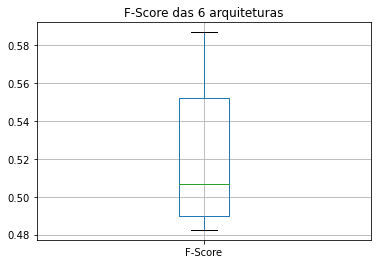

In [7]:
# 3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 100 repetições
pd.DataFrame(top6_architecture_f1_score_array, columns = ['F-Score']).boxplot().set_title('F-Score das 6 arquiteturas') 

## Considerações Parciais

1. É possível identificar uma rede com desempenho superior às demais?
2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?
3. Considerar os atributos categóricos trouxe melhorias? Justifique.
4. Um número maior de épocas trouxe melhorias?
5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?

##### 1. É possível identificar uma rede com desempenho superior às demais?
Resposta: De acordo com os testes executados, a configuração de rede que teve o melhor desempenho foi a rede com otimizador=sgd, épocas=80, com neuronios na camada oculta=(16,) e função de ativação=tangente, pois conseguiu acurácia igual a 75% e f-score 49%


##### 2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?
Resposta: Pirâmide Geométrica, pois teve resultados de acurácia e f-score levemente superior as outras estratégias


##### 3. Considerar os atributos categóricos trouxe melhorias? Justifique.
Resposta: Com certeza, ao utilizar os atributos Soil_Type e Wilderness_Area foi possivel observar melhorias tanto na acurácia quanto no f-score nas três melhores redes utilizando estratégia própria e pirâmide geométrica


##### 4. Um número maior de épocas trouxe melhorias?
Resposta: Sim, trouxe uma leve melhoria. Na atividade "Propondo Novas Arquiteturas" as 3 melhores arquiteturas tinham um número elevado de épocas.


##### 5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?
Resposta: O tempo de execução foi o principal problema, pois algumas das configurações das redes tiveram que ser reexecutadas de acordo com erros nos códigos que iam sendo encontrados durante a execução do projeto.
